In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
import datetime as dt
from datetime import timedelta
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, VotingClassifier, StackingClassifier, GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, RidgeCV, LassoCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, roc_curve, auc
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')

In [2]:
df=pd.read_csv('Employee_project (after data analysis).csv')
df=df.iloc[:,1:]
print(df.shape)
df.head()

(5000, 12)


,Call_Id,Date,Agent,Department,Answered,Resolved,Speed_of_Answer,AvgTalkDuration,Satisfaction_rating,Hike,Week_number,duration_in_second
0,ID0001,2015-01-01 09:12:58.000,Diane,Washing Machine,Y,Y,109.0,00:02:23.210000,3.0,0,1,143
1,ID0002,2015-01-01 09:12:57.600,Becky,Air Conditioner,Y,N,70.0,00:04:02.323000,3.0,0,1,242
2,ID0003,2015-01-01 09:47:31.200,Stewart,Washing Machine,Y,Y,10.0,00:02:11.202000,3.0,0,1,131
3,ID0004,2015-01-01 09:47:31.200,Greg,Washing Machine,Y,Y,53.0,00:00:37.481000,2.0,0,1,37
4,ID0005,2015-01-01 10:00:28.800,Becky,Toaster,Y,Y,95.0,00:01:00.083000,3.0,0,1,60


### EDA:

In [3]:
df.isna().sum().sum()

0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Call_Id              5000 non-null   object 
 1   Date                 5000 non-null   object 
 2   Agent                5000 non-null   object 
 3   Department           5000 non-null   object 
 4   Answered             5000 non-null   object 
 5   Resolved             5000 non-null   object 
 6   Speed_of_Answer      5000 non-null   float64
 7   AvgTalkDuration      5000 non-null   object 
 8   Satisfaction_rating  5000 non-null   float64
 9   Hike                 5000 non-null   int64  
 10  Week_number          5000 non-null   int64  
 11  duration_in_second   5000 non-null   int64  
dtypes: float64(2), int64(3), object(7)
memory usage: 468.9+ KB


In [5]:
df['Date']=pd.to_datetime(df['Date'])
df['Day']=df['Date'].dt.day
df['Month']=df['Date'].dt.month
print(df.shape)

(5000, 14)


In [6]:
print(df['Month'].unique())
print(df['Day'].unique())

[1 2 3]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]


In [7]:
ohe=OneHotEncoder()
agent=ohe.fit_transform(df[['Agent']]).toarray()
dept=ohe.fit_transform(df[['Department']]).toarray()
answer=ohe.fit_transform(df[['Answered']]).toarray()
resolve=ohe.fit_transform(df[['Resolved']]).toarray()

In [8]:
encoded_df=pd.concat([pd.DataFrame(dept, columns=['Dept Air_Conditioner', 'Dept Fridge', 'Dept Television', 'Dept Toaster','Dept Washing Machine']).astype('int'), 
                  pd.DataFrame(agent, columns=['Emp Becky', 'Emp Dan', 'Emp Diane', 'Emp Greg','Emp Jim','Emp Joe','Emp Martha','Emp Stewart']).astype('int'),
                  pd.DataFrame(answer, columns=['Answer NO', 'Answer YES']).astype('int'),
                  pd.DataFrame(resolve, columns=['Resolve NO', 'Resolve YES']).astype('int')], axis=1)
print(encoded_df.shape)
encoded_df.head()

(5000, 17)


,Dept Air_Conditioner,Dept Fridge,Dept Television,Dept Toaster,Dept Washing Machine,Emp Becky,Emp Dan,Emp Diane,Emp Greg,Emp Jim,Emp Joe,Emp Martha,Emp Stewart,Answer NO,Answer YES,Resolve NO,Resolve YES
0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1
1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0
2,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1
3,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1
4,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1


In [9]:
df_final=pd.concat([df, encoded_df], axis=1)
print(df_final.shape)
df_final.head()

(5000, 31)


,Call_Id,Date,Agent,Department,Answered,Resolved,Speed_of_Answer,AvgTalkDuration,Satisfaction_rating,Hike,Week_number,duration_in_second,Day,Month,Dept Air_Conditioner,Dept Fridge,Dept Television,Dept Toaster,Dept Washing Machine,Emp Becky,Emp Dan,Emp Diane,Emp Greg,Emp Jim,Emp Joe,Emp Martha,Emp Stewart,Answer NO,Answer YES,Resolve NO,Resolve YES
0,ID0001,2015-01-01 09:12:58.000,Diane,Washing Machine,Y,Y,109.0,00:02:23.210000,3.0,0,1,143,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1
1,ID0002,2015-01-01 09:12:57.600,Becky,Air Conditioner,Y,N,70.0,00:04:02.323000,3.0,0,1,242,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0
2,ID0003,2015-01-01 09:47:31.200,Stewart,Washing Machine,Y,Y,10.0,00:02:11.202000,3.0,0,1,131,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1
3,ID0004,2015-01-01 09:47:31.200,Greg,Washing Machine,Y,Y,53.0,00:00:37.481000,2.0,0,1,37,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1
4,ID0005,2015-01-01 10:00:28.800,Becky,Toaster,Y,Y,95.0,00:01:00.083000,3.0,0,1,60,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1


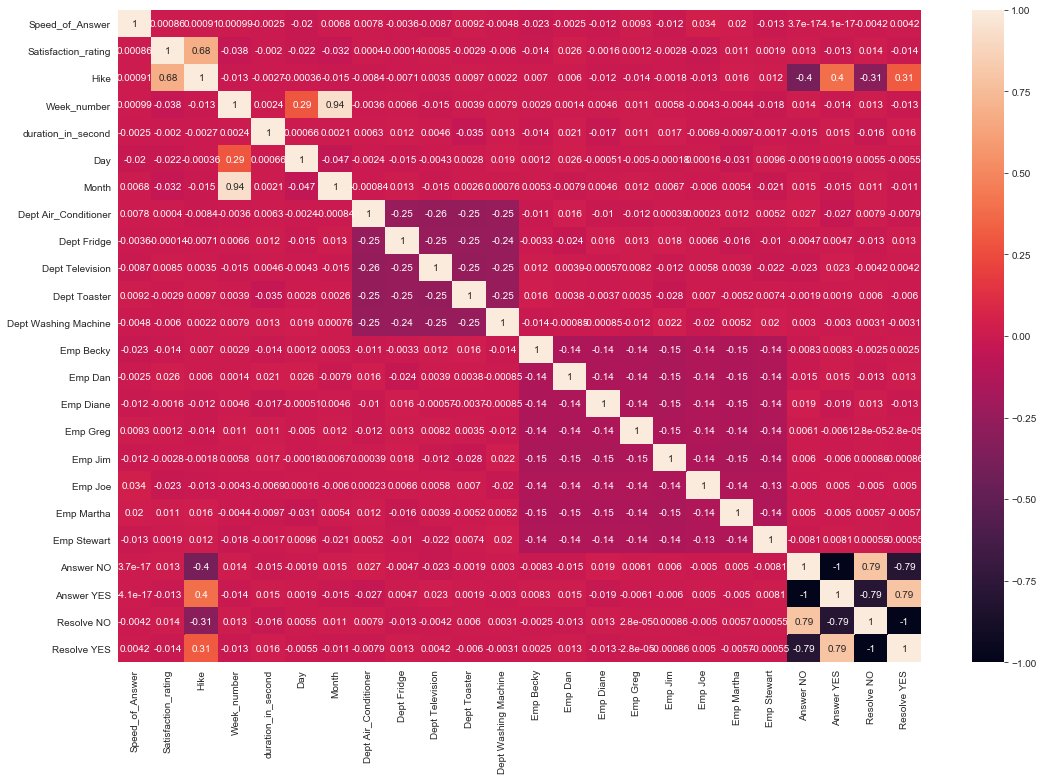

In [10]:
plt.rcParams['figure.figsize']=18,12
sns.heatmap(df_final.corr(method='pearson'), annot=True)

Correlation of features with target variable.

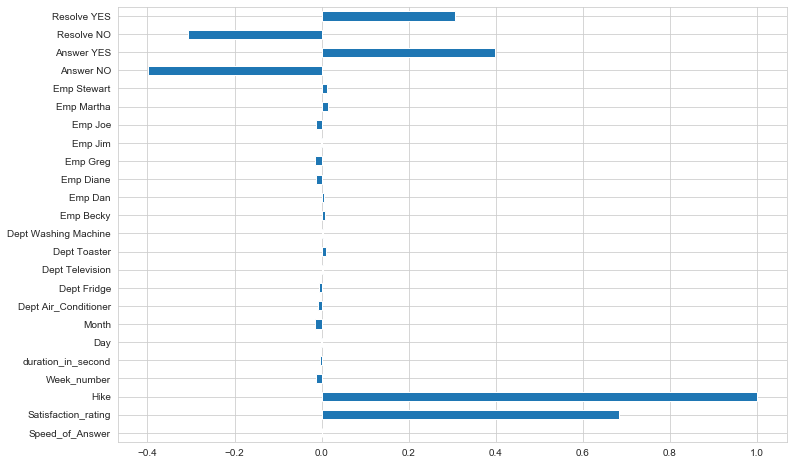

In [11]:
plt.rcParams['figure.figsize']=12,8
df_final.corr(method='pearson')['Hike'].plot(kind='barh')

In [12]:
df_final.head(2)

,Call_Id,Date,Agent,Department,Answered,Resolved,Speed_of_Answer,AvgTalkDuration,Satisfaction_rating,Hike,Week_number,duration_in_second,Day,Month,Dept Air_Conditioner,Dept Fridge,Dept Television,Dept Toaster,Dept Washing Machine,Emp Becky,Emp Dan,Emp Diane,Emp Greg,Emp Jim,Emp Joe,Emp Martha,Emp Stewart,Answer NO,Answer YES,Resolve NO,Resolve YES
0,ID0001,2015-01-01 09:12:58.000,Diane,Washing Machine,Y,Y,109.0,00:02:23.210000,3.0,0,1,143,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1
1,ID0002,2015-01-01 09:12:57.600,Becky,Air Conditioner,Y,N,70.0,00:04:02.323000,3.0,0,1,242,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0


In [13]:
df_final_columns=list(df_final.columns)
df_final_columns[6]='AvgTalkDuration'
df_final_columns[7]='Speed_of_Answer'
del df_final_columns[9]
df_final_columns.append('Hike')

In [14]:
df_final=df_final.reindex(columns=df_final_columns)

### Scaling:

In [15]:
X=df_final.iloc[:,7:-1]
X_columns=list(X.columns)
print(X_columns)
print(X.shape)
X.head(2)

['Speed_of_Answer', 'Satisfaction_rating', 'Week_number', 'duration_in_second', 'Day', 'Month', 'Dept Air_Conditioner', 'Dept Fridge', 'Dept Television', 'Dept Toaster', 'Dept Washing Machine', 'Emp Becky', 'Emp Dan', 'Emp Diane', 'Emp Greg', 'Emp Jim', 'Emp Joe', 'Emp Martha', 'Emp Stewart', 'Answer NO', 'Answer YES', 'Resolve NO', 'Resolve YES']
(5000, 23)


,Speed_of_Answer,Satisfaction_rating,Week_number,duration_in_second,Day,Month,Dept Air_Conditioner,Dept Fridge,Dept Television,Dept Toaster,Dept Washing Machine,Emp Becky,Emp Dan,Emp Diane,Emp Greg,Emp Jim,Emp Joe,Emp Martha,Emp Stewart,Answer NO,Answer YES,Resolve NO,Resolve YES
0,109.0,3.0,1,143,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1
1,70.0,3.0,1,242,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0


In [16]:
Y=df_final.iloc[:,[-1]]
Y.head(2)

,Hike
0,0
1,0


In [17]:
scale=StandardScaler()
X1=scale.fit_transform(X)
X1=pd.DataFrame(X1, columns=X_columns)
X1.head()

,Speed_of_Answer,Satisfaction_rating,Week_number,duration_in_second,Day,Month,Dept Air_Conditioner,Dept Fridge,Dept Television,Dept Toaster,Dept Washing Machine,Emp Becky,Emp Dan,Emp Diane,Emp Greg,Emp Jim,Emp Joe,Emp Martha,Emp Stewart,Answer NO,Answer YES,Resolve NO,Resolve YES
0,1.371452,-0.339093,-1.690277,-0.724305,-1.621738,-1.177535,-0.505931,-0.492488,-0.506866,-0.502187,2.030505,-0.380035,-0.380724,2.626575,-0.377619,-0.392006,-0.366822,-0.382444,-0.362952,-0.483063,0.483063,-0.609398,0.609398
1,0.081974,-0.339093,-1.690277,0.165315,-1.621738,-1.177535,1.976555,-0.492488,-0.506866,-0.502187,-0.492488,2.631336,-0.380724,-0.380724,-0.377619,-0.392006,-0.366822,-0.382444,-0.362952,-0.483063,0.483063,1.640964,-1.640964
2,-1.901840,-0.339093,-1.690277,-0.832138,-1.621738,-1.177535,-0.505931,-0.492488,-0.506866,-0.502187,2.030505,-0.380035,-0.380724,-0.380724,-0.377619,-0.392006,-0.366822,-0.382444,2.755189,-0.483063,0.483063,-0.609398,0.609398
3,-0.480107,-1.163734,-1.690277,-1.676828,-1.621738,-1.177535,-0.505931,-0.492488,-0.506866,-0.502187,2.030505,-0.380035,-0.380724,-0.380724,2.648173,-0.392006,-0.366822,-0.382444,-0.362952,-0.483063,0.483063,-0.609398,0.609398
4,0.908563,-0.339093,-1.690277,-1.470148,-1.621738,-1.177535,-0.505931,-0.492488,-0.506866,1.991292,-0.492488,2.631336,-0.380724,-0.380724,-0.377619,-0.392006,-0.366822,-0.382444,-0.362952,-0.483063,0.483063,-0.609398,0.609398


### Feature Extraction:

[1.56036063e-01 8.58179226e-02 5.55825004e-02 5.51870425e-02
 5.48268645e-02 5.45273366e-02 5.06875370e-02 5.01332825e-02
 4.99244675e-02 4.97307135e-02 4.94503613e-02 4.90135936e-02
 4.86622886e-02 4.43817540e-02 4.30750673e-02 4.25556388e-02
 4.22923893e-02 1.79651882e-02 1.49988913e-04 5.69861374e-33
 6.64000958e-34 3.26633604e-34 1.29182496e-34]


Text(0, 0.5, 'cumulative explained variance')

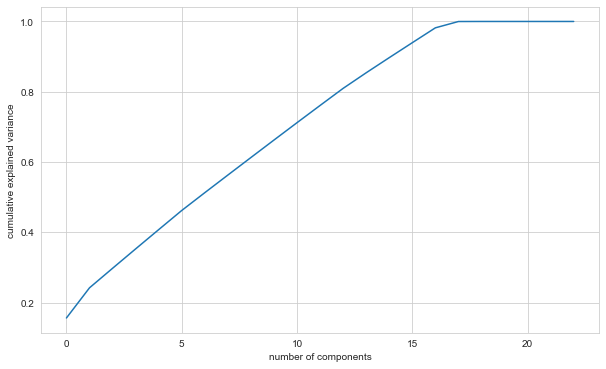

In [18]:
pca_choose=PCA()
aa=pca_choose.fit_transform(X1)
exp_var=pca_choose.explained_variance_ratio_
print(exp_var)
plt.rcParams['figure.figsize']=10,6
plt.plot(np.cumsum(exp_var))
plt.xlabel('number of components', )
plt.ylabel('cumulative explained variance')

Through this graph, we can conclude that the adequate no. of components is 18.

In [19]:
pca=PCA(n_components=18, random_state=10)
X1=pca.fit_transform(X1)
exp_var=pca.explained_variance_ratio_

In [20]:
X1=pd.DataFrame(X1, columns=['PC '+str(i) for i in range(1, 19)])
print(X1.shape)
X1.head()

(5000, 18)


,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,PC 10,PC 11,PC 12,PC 13,PC 14,PC 15,PC 16,PC 17,PC 18
0,-1.093940,-2.193863,1.102533,0.179300,-0.966162,1.222120,0.842364,0.907742,2.162077,0.810480,-0.032622,0.990644,-1.362884,-1.549700,0.067701,-1.350941,0.066937,-0.077394
1,1.122587,-2.295340,0.065946,-1.070189,0.760760,-1.252323,-0.430951,2.103911,-1.074870,-0.881697,0.582718,-0.709514,-1.409916,-1.147241,0.605863,-0.189325,0.240233,2.172673
2,-1.136521,-2.310606,1.472734,-0.544469,-1.272392,1.721839,-0.039258,0.684480,0.181321,0.149358,1.765895,-0.492194,1.560671,-0.827899,-0.226290,0.623915,2.255618,-0.159935
3,-1.119608,-2.123724,0.794555,0.235659,-0.867254,1.250756,0.927282,-1.075282,-0.106278,-0.820625,1.850757,0.711599,-1.846088,-0.330158,-0.717137,-0.854504,2.335613,-0.085214
4,-1.139001,-2.212249,-2.341512,-0.632010,-1.407815,-0.057636,0.042564,1.750225,-1.104799,-0.830665,-0.145233,-0.408230,-1.096053,-1.350593,-0.407106,-1.234566,0.333607,-0.148137


### Modelling:

In [21]:

def classify(model, x, y):
    X_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.3)
    model.fit(X_train, np.ravel(y_train))
    
    print("Training Accuracy: ", round(model.score(X_train, np.ravel(y_train))*100,3))
    print("Testing Accuracy: ", round(model.score(x_test, np.ravel(y_test))*100,3))
    score=cross_val_score(model, x, np.ravel(y), cv=KFold(n_splits=5))
    print("Model Accuracy for cross validation:", round(np.mean(score)*100,3))
    y_pred=model.predict(x_test)
    plt.rcParams['figure.figsize']=16,2
    plt.title(str(model))
    plt.scatter(np.ravel(x_test.iloc[:,[-1]]), np.ravel(y_test), alpha=0.8, s=80)
    plt.scatter(np.ravel(x_test.iloc[:,[-1]]), np.ravel(y_pred), alpha=0.2, s=80)
    plt.show()

LogisticRegression(max_iter=500) :
Training Accuracy:  100.0
Testing Accuracy:  100.0
Model Accuracy for cross validation: 100.0


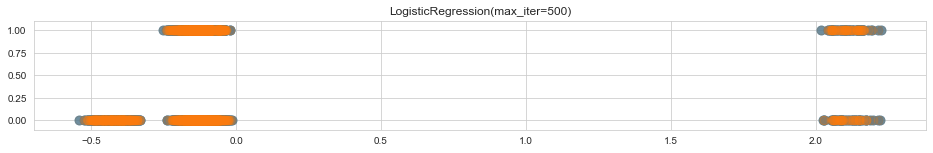



KNeighborsClassifier(n_neighbors=9) :
Training Accuracy:  92.686
Testing Accuracy:  87.2
Model Accuracy for cross validation: 88.12


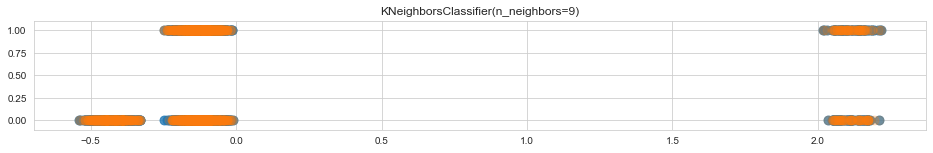



RandomForestClassifier() :
Training Accuracy:  100.0
Testing Accuracy:  97.733
Model Accuracy for cross validation: 97.6


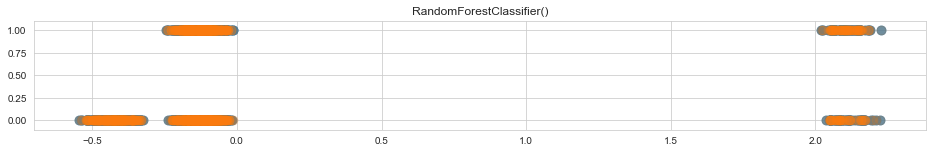



GradientBoostingClassifier() :
Training Accuracy:  99.971
Testing Accuracy:  99.333
Model Accuracy for cross validation: 98.28


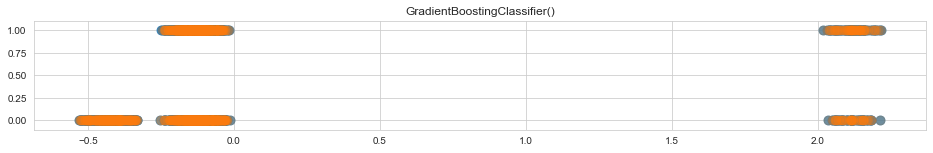

In [22]:
classifiers=[LogisticRegression(solver='lbfgs', penalty='l2', max_iter=500, C=1.0),
             KNeighborsClassifier(n_neighbors=9, metric='minkowski', p=2),
             RandomForestClassifier(n_estimators=100, criterion='gini' ,bootstrap=True),
             GradientBoostingClassifier(learning_rate=0.1)]
for classifier in classifiers:
    print(classifier,':')
    classify(classifier, X1, Y)
    print('\n')

Among these classifiers, LogisticRegression attains the maximum accuracy in KFold cross validation with n_splits=5

In [24]:
X_train, x_test, y_train, y_test=train_test_split(X1, Y, test_size=0.3, random_state=1)
print(X_train.shape, y_train.shape, x_test.shape, y_test.shape)

(3500, 18) (3500, 1) (1500, 18) (1500, 1)


In [25]:
vote_clf = VotingClassifier(estimators=[('lr', classifiers[0]), ('knn', classifiers[1]), 
                                        ('rfc', classifiers[2]), ('gbc', classifiers[3])], voting='hard')

In [26]:
estimator=[('lr', classifiers[0]), ('knn', classifiers[1]), ('rfc', classifiers[2]), ('gbc', classifiers[3])]
final_classifier = StackingClassifier(estimators=estimator, final_estimator=vote_clf)
final_classifier.fit(X_train, np.ravel(y_train))
print(final_classifier.score(X_train, np.ravel(y_train)))
print(final_classifier.score(x_test, np.ravel(y_test)))

1.0
1.0


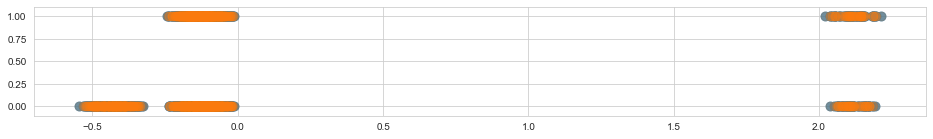

In [27]:
y_pred=final_classifier.predict(x_test)
plt.rcParams['figure.figsize']=16,2
plt.scatter(np.ravel(x_test.iloc[:,[-1]]), np.ravel(y_test), alpha=0.8, s=80)
plt.scatter(np.ravel(x_test.iloc[:,[-1]]), np.ravel(y_pred), alpha=0.2, s=80)
plt.show()

### Evaluation:

In [28]:
def evaluation(a, b):
    prediction=final_classifier.predict(a)
    print('Confusion Matrix - \n')
    print(confusion_matrix(b, prediction), '\n')
    print('Classification Report - \n')
    print(classification_report(b, prediction))
    plt.rcParams['figure.figsize']=16,2
    plt.scatter(np.ravel(a.iloc[:,[-1]]), np.ravel(b), alpha=0.5, s=80)
    plt.scatter(np.ravel(a.iloc[:,[-1]]), np.ravel(prediction), alpha=0.4, s=80)
    plt.show()

    precision, recall, _= precision_recall_curve(b, prediction)
    plt.plot(recall, precision)
    plt.xlabel('Recall',fontsize=20)
    plt.ylabel('Precision', fontsize=20)
    plt.title('Precision VS Recall', fontsize=20)
    plt.show()
    fpr, tpr, _ = roc_curve(b, prediction)
    plt.plot(fpr, tpr)
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.title('ROC Curve of kNN')
    plt.show()

Confusion Matrix - 

[[904   0]
 [  0 596]] 

Classification Report - 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       904
           1       1.00      1.00      1.00       596

    accuracy                           1.00      1500
   macro avg       1.00      1.00      1.00      1500
weighted avg       1.00      1.00      1.00      1500



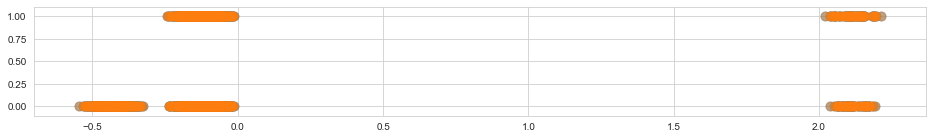

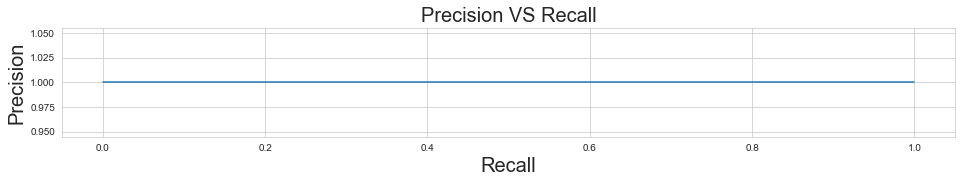

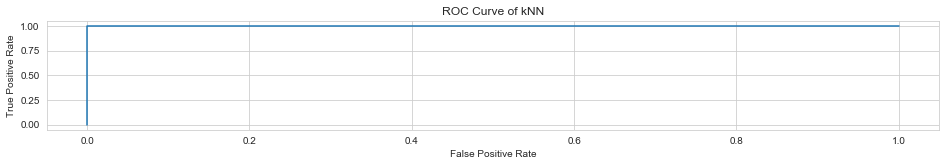

In [29]:
evaluate_ml=evaluation(x_test, y_test)

In [42]:
df.to_csv('Employee_project (after ML).csv')